<figure>
  <IMG SRC="https://raw.githubusercontent.com/pastas/pastas/master/doc/_static/Art_logo.jpg" WIDTH=250 ALIGN="right">
</figure>

# Adding river levels
*Developed by Raoul Collenteur*

In this example it is shown how to create a time series model with not only evaporation and precipitation, but also including surface water levels. The following data is used:

- groundwater.csv: groundwaterlevels
- rain.csv: Precipitation
- evap.csv: Potential evaporation
- waterlevel.csv: Surface waterlevel

In [1]:
import pandas as pd
import pastas as ps
import matplotlib.pyplot as plt

%matplotlib notebook

ps.show_versions()

Python version: 3.7.6 | packaged by conda-forge | (default, Jan  7 2020, 22:05:27) 
[Clang 9.0.1 ]
Numpy version: 1.17.5
Scipy version: 1.4.1
Pandas version: 0.25.0
Pastas version: 0.14.0b


### 1. import and plot the data

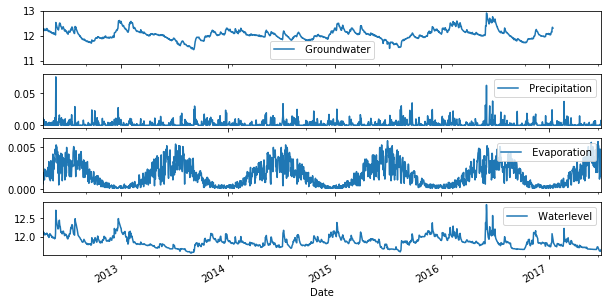

In [2]:
oseries = pd.read_csv("data_notebook_5/groundwater.csv", parse_dates=True, 
                      squeeze=True, index_col=0)
rain = pd.read_csv("data_notebook_5/rain.csv", parse_dates=True, squeeze=True, 
                   index_col=0)
evap = pd.read_csv("data_notebook_5/evap.csv", parse_dates=True, squeeze=True, 
                   index_col=0)
waterlevel = pd.read_csv("data_notebook_5/waterlevel.csv", parse_dates=True, 
                         squeeze=True, index_col=0)

fig, axes = plt.subplots(4,1, figsize=(10, 5), sharex=True)
oseries.plot(ax=axes[0], x_compat=True, legend=True)
rain.plot(ax=axes[1], x_compat=True, legend=True)
evap.plot(ax=axes[2], x_compat=True, legend=True)
waterlevel.plot(ax=axes[3], x_compat=True, legend=True)


### 2. Create a timeseries model


INFO: Cannot determine frequency of series  Groundwater
INFO: Time Series  Groundwater: 5 nan-value(s) was/were found and filled with: drop
INFO: Inferred frequency from time series  Precipitation: freq=D 
INFO: Inferred frequency from time series  Evaporation: freq=D 


Model Results  Groundwater          Fit Statistics
nfev     41                     EVP          61.04
nobs     2412                   R2            0.61
noise    True                   RMSE          0.14
tmin     2000-01-01 00:00:00    AIC          10.27
tmax     2017-01-16 00:00:00    BIC          45.00
freq     D                      ___               
warmup   3650 days 00:00:00     ___               
solver   LeastSquares           ___               

Parameters (6 were optimized)
                optimal   stderr     initial  vary
recharge_A   400.890627   ±9.34%  203.104730  True
recharge_n     1.013960   ±1.16%    1.000000  True
recharge_a    80.063177  ±10.27%   10.000000  True
recharge_f    -0.641339   ±8.49%   -1.000000  True
constant_d    11.556524   ±0.63%   12.026835  True
noise_alpha   43.699015  ±12.72%    1.000000  True

Parameter correlations |rho| > 0.5
recharge_A recharge_a  0.87
           recharge_f  0.52
           constant_d -0.88
recharge_a constant_d -0.69
recha

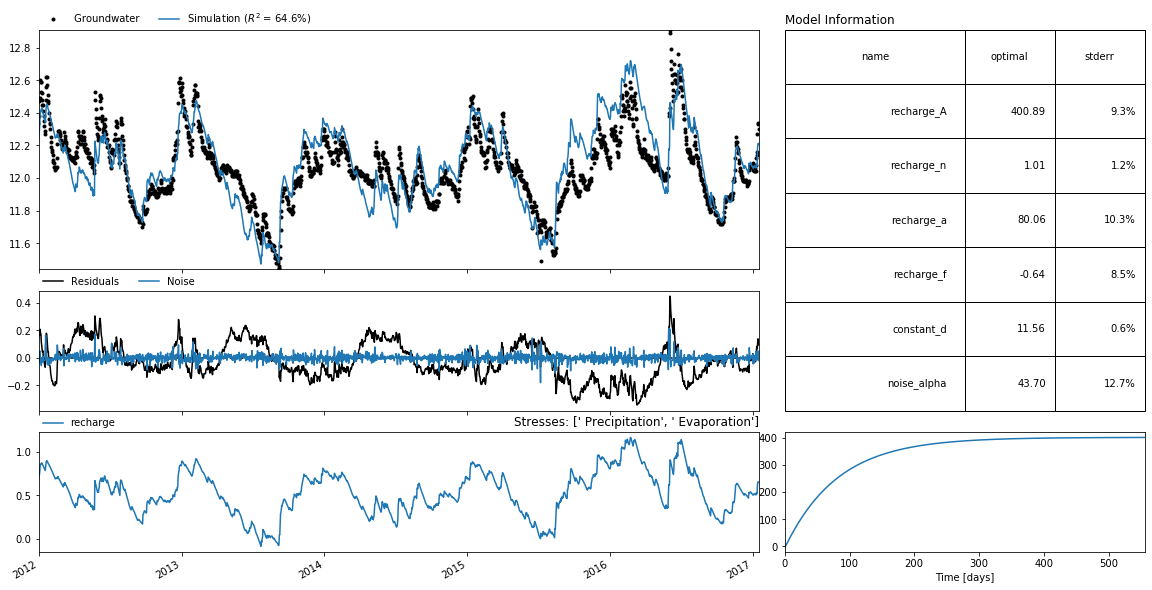

In [3]:
ml = ps.Model(oseries)

sm = ps.StressModel2([rain, evap], rfunc=ps.Gamma, name="recharge")
ml.add_stressmodel(sm)

ml.solve(tmin="2000")
ml.plots.results(tmin="2012", figsize=(16, 8))
print("The explained variance percentage over the period 2012-2017 is: %s" % ml.stats.evp(tmin="2012"))

### 3. Adding surface water level

In [4]:
w = ps.StressModel(waterlevel, rfunc=ps.Exponential,  name="waterlevel", 
                   settings="waterlevel")

# Normalize the stress by the mean such that only the variation in the waterlevel matters
w.update_stress(norm="mean")

ml.add_stressmodel(w)
ml.solve(tmin="2012")

INFO: Cannot determine frequency of series  Waterlevel
INFO: Time Series  Waterlevel was sampled down to freq D with method timestep_weighted_resample
INFO: Time Series  Waterlevel was sampled down to freq D with method timestep_weighted_resample


Model Results  Groundwater          Fit Statistics
nfev     46                     EVP          55.25
nobs     1843                   R2            0.55
noise    True                   RMSE          0.15
tmin     2012-01-01 00:00:00    AIC          15.88
tmax     2017-01-16 00:00:00    BIC          60.03
freq     D                      ___               
warmup   3650 days 00:00:00     ___               
solver   LeastSquares           ___               

Parameters (8 were optimized)
                optimal   stderr     initial  vary
recharge_A    90.648522  ±12.53%  203.104730  True
recharge_n     1.306701   ±2.75%    1.000000  True
recharge_a    16.018726  ±13.92%   10.000000  True
recharge_f    -0.241811  ±68.37%   -1.000000  True
waterlevel_A   0.496853   ±4.65%    6.401099  True
waterlevel_a   0.585568   ±9.13%   10.000000  True
constant_d    11.876097   ±0.41%   12.026835  True
noise_alpha   73.391555  ±24.50%    1.000000  True

Parameter correlations |rho| > 0.5
recharge_A   re

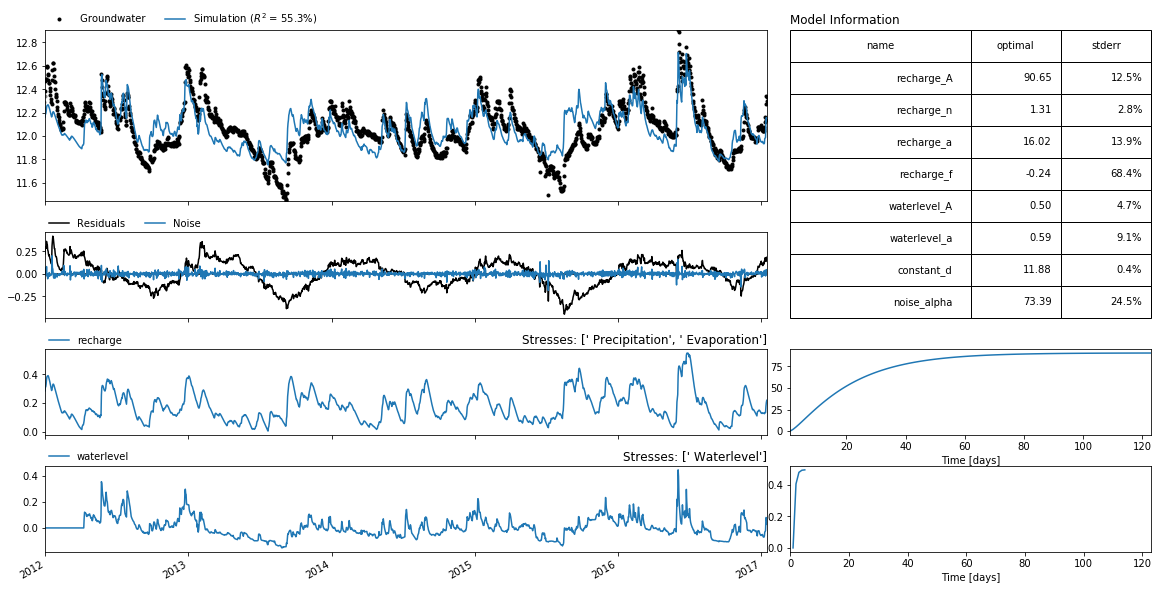

In [5]:
ml.plots.results(figsize=(16, 8))